In [30]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import numpy.polynomial.polynomial as poly

plt.style.use('seaborn-poster')

## Solution to problem 7

In [14]:
def my_interp_plotter(x, y, X, option):
    
    f = interp1d(x, y, kind = option)
    Y = f(X)
    
    plt.figure(figsize = (10, 8))
    plt.plot(X, Y, 'b', label = 'interpolation')
    plt.plot(x, y, 'ro', label = 'data points')
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.title(f'{option} interpolation of data')
    plt.legend()
    plt.savefig(f'{option}_interpolation.jpg', dpi=300,bbox_inches='tight')
    plt.show()

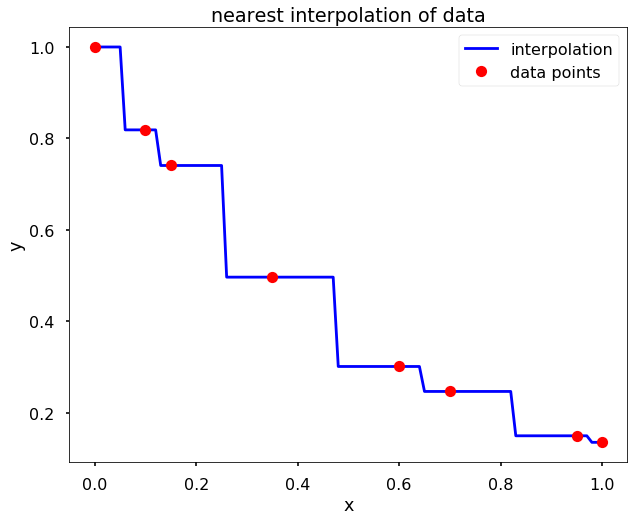

In [15]:
x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])

my_interp_plotter(x, y, np.linspace(0, 1, 101), 'nearest')

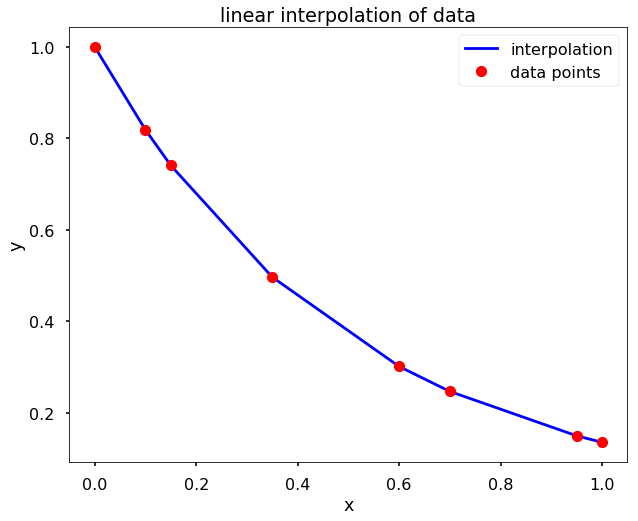

In [16]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), 'linear')

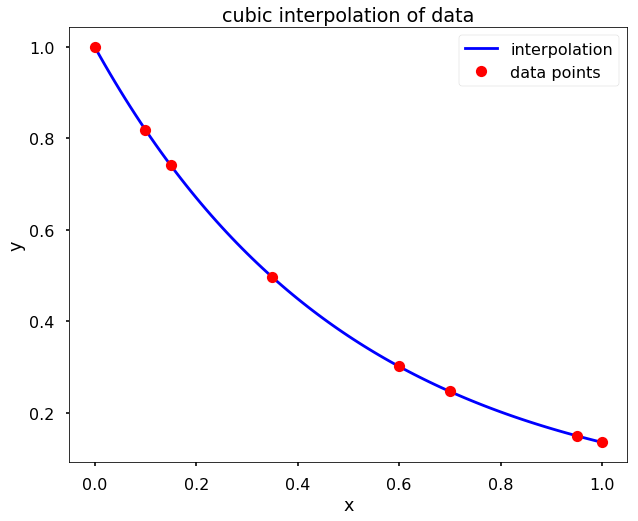

In [17]:
my_interp_plotter(x, y, np.linspace(0, 1, 101), 'cubic')

## Solution to problem 8

In [23]:
def my_D_cubic_spline(x, y, X, D):
    
    f = CubicSpline(x, y, bc_type=((1, D), (1, D)))
    Y = f(X)
    
    return Y

In [24]:
x = [0, 1, 2, 3, 4]
y = [0, 0, 1, 0, 0]
X = np.linspace(0, 4, 101)
my_D_cubic_spline(x, y, 1.5, 1)

array(0.54017857)

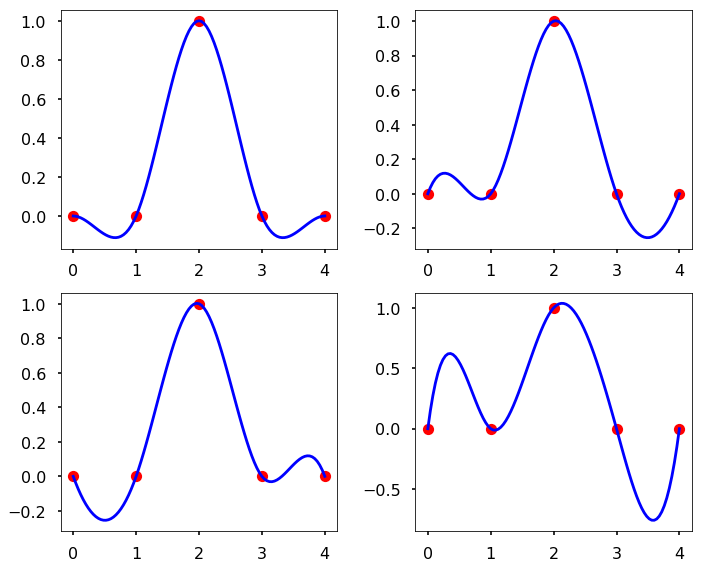

In [29]:
plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, 'ro', X, my_D_cubic_spline(x, y, X, 0), 'b')
plt.subplot(222)
plt.plot(x, y, 'ro', X, my_D_cubic_spline(x, y, X, 1), 'b')
plt.subplot(223)
plt.plot(x, y, 'ro', X, my_D_cubic_spline(x, y, X, -1), 'b')
plt.subplot(224)
plt.plot(x, y, 'ro', X, my_D_cubic_spline(x, y, X, 4), 'b')
plt.tight_layout()
plt.savefig(f'17.06.04-D_cubic_interpolation.jpg', dpi=300,bbox_inches='tight')
plt.show()

## Solution to problem 9

In [43]:
def my_lagrange(x, y, X):
    
    n = len(x)
    
    L = 0
    for i in range(n):
        
        P_i = 1
        for j in range(n):
            if j == i:
                continue
                
            P_i *= poly.Polynomial([-x[j]/(x[i] - x[j]), 1/(x[i] - x[j])])
        
        L += y[i] * P_i
        
    Y = L(X)
    
    return Y

In [44]:
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

# solution Y = 
Y = my_lagrange(x, y, 1.5)

X = np.linspace(0, 4, 101)

In [42]:
Y

1.7421874999999953

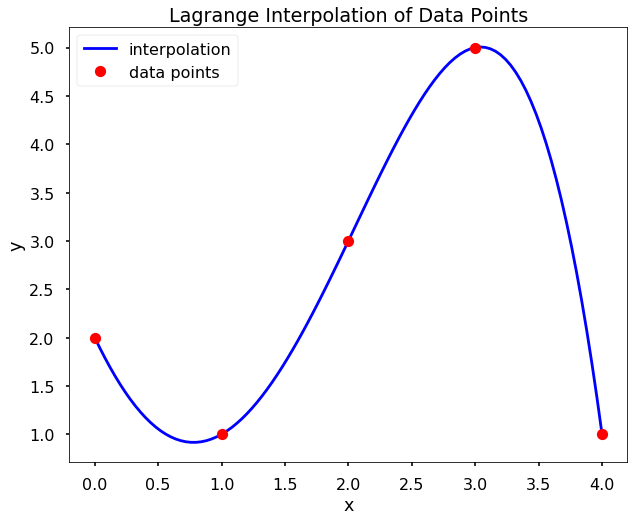

In [46]:
plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), 'b', label = 'interpolation')
plt.plot(x, y, 'ro', label = 'data points')

plt.xlabel('x')
plt.ylabel('y')

plt.title(f'Lagrange Interpolation of Data Points')
plt.legend()
plt.savefig(f'Lagrange_interpolation.jpg', dpi=300,bbox_inches='tight')